<a href="https://colab.research.google.com/github/saritmaitra/Loan_approval_system/blob/main/Model_Development_Loan_Approval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
# loading train data
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [3]:
# Import data 
df = pd.read_csv("loan_train.csv")
print('Information on dataset:')
df.info()

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
# replacing 3+ in Dependents variable with 3 
df['Dependents'].replace('3+', 3, inplace=True)
df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

## Data Pre-processing
### Missing value and outlier treatment

In [6]:
# check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- numerical variables: imputation using mean or median
- categorical variables: imputation using mode
- There are very less missing values in Gender, Married, Dependents, 
- Credit_History and Self_Employed features so we fill them using the mode of the features.
- If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [7]:
# replace missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [8]:
df['Loan_Amount_Term'].value_counts()
# value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
# replace missing value with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
# replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
# loading test data
uploaded = files.upload()

Saving loan_test.csv to loan_test.csv


In [13]:
# Import data 
df1 = pd.read_csv("loan_test.csv")
print('Information on dataset:')
df1.info()

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df1['Dependents'].replace('3+', 3, inplace=True)

# replace missing values in Test set with mode/median from Training set
df1['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df1['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df1['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# check whether all the missing values are filled in the Test dataset
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Model Development and Evaluation

In [15]:
# drop Loan_ID 
train = df.drop('Loan_ID', axis=1) # train
test = df1.drop('Loan_ID', axis=1) # test

# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(X.shape, train.shape, test.shape)
X.head()

(614, 20) (614, 21) (367, 20)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 20), (123, 20), (491,), (123,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit model
model = LogisticRegression()
model.fit(x_train, y_train)
# prediction
pred_test = model.predict(x_test)
# calculate accuracy score
accuracy_score(y_test, pred_test)

0.8373983739837398

Confusion Matrix :
[[15 18]
 [ 2 88]]

Accuracy: 83.74%

Report : 
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



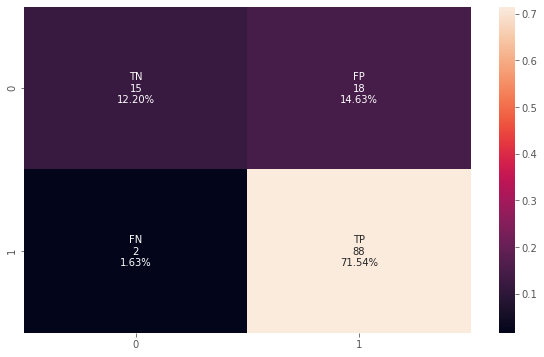

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

cm = confusion_matrix(y_test, pred_test) 
print('Confusion Matrix :')
print(cm)
print() 

# evaluate predictions
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print()

print ('Report : ')
print (classification_report(y_test, pred_test)) 

import seaborn as sns
names = ['TN','FP','FN','TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

#plt.figure(figsize=(6,4))
sns.heatmap(cm/np.sum(cm), annot=labels, fmt='')
plt.show()

Confusion matrix
[[15 18]
 [ 2 88]]


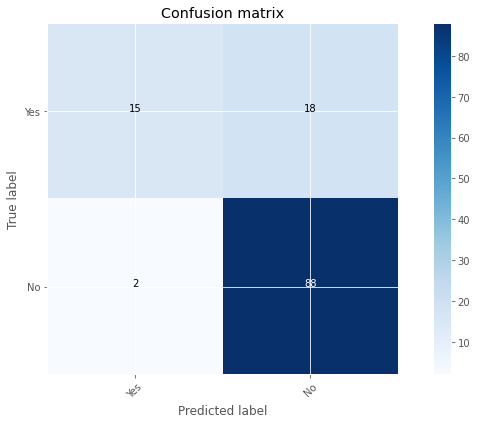

In [ ]:
import itertools
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],
                      title='Confusion matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



Model can predict with 83% precision. 

In [22]:
# prediction on test set
log_pred = model.predict(test)
# prediction
log_pred[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [23]:
# Time for Classification Models
import time
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [24]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(x_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), 
                              columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(x_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(x_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

df_results = batch_classify(x_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.08 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 0.05 s
trained Gradient Boosting Classifier in 0.17 s
trained Decision Tree in 0.00 s
trained Random Forest in 0.03 s
trained Neural Net in 0.39 s
trained Naive Bayes in 0.01 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.004668
2                    Linear SVM     0.997963       0.050805
5                 Random Forest     0.997963       0.033364
3  Gradient Boosting Classifier     0.883910       0.168949
0           Logistic Regression     0.808554       0.075444
7                   Naive Bayes     0.790224       0.005384
1             Nearest Neighbors     0.737271       0.008312
6                    Neural Net     0.688391       0.388567


### Avoiding Overfitting:

The best alternative to avoid overfitting is to use cross validation. I have used k-fold cross-validation, where k in this case is 5. With this approach, we will have not one estimate but 5 estimates for the generalization error.

In [25]:
# Use Starified Cross-validation.
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import average_precision_score

kfold = StratifiedKFold(n_splits=5, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, x_train, y_train, cv=kfold)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=kfold)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=kfold)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=kfold)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=kfold)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=100)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=kfold)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, x_train, y_train, cv=kfold)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train, y_train, cv=kfold)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [26]:
# Log Reg performed best
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.806473
5,Rand FC,0.794187
4,Grad B CLF,0.769924
3,Dec Tree,0.698598
1,SVC,0.674129
2,KNN,0.645599
6,Neural Classifier,0.572171
7,Naives Bayes,0.572171


### Feature importance

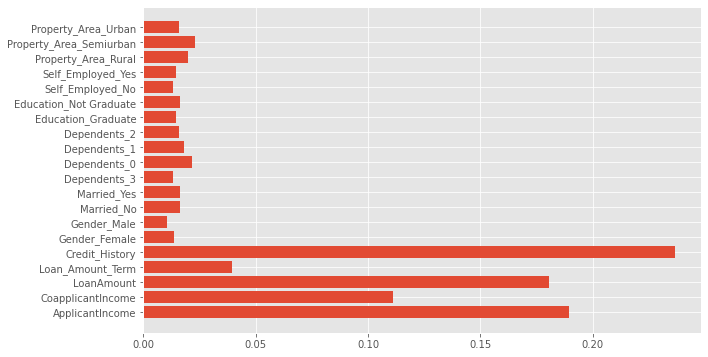

In [ ]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# get importance
plt.barh(X.columns, rand_clf.feature_importances_)
plt.show()

### Confusion Matrix:
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential yes. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.

In [27]:
# Cross validate Log Reg Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=kfold)
from sklearn.metrics import accuracy_score
log_reg.fit(x_train, y_train)
print ("Logistic Regression Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Logistic Regression Classifier accuracy is 0.81


In [28]:
# test data
y_test_pred = cross_val_predict(log_reg, x_test, y_test, cv=kfold)
from sklearn.metrics import accuracy_score
print ("Logistic Regression Classifier accuracy is %2.2f" % accuracy_score(y_test, y_test_pred))

Logistic Regression Classifier accuracy is 0.78


Confusion Matrix :
[[10 23]
 [ 4 86]]

Accuracy: 78.05%

Report : 
              precision    recall  f1-score   support

           0       0.71      0.30      0.43        33
           1       0.79      0.96      0.86        90

    accuracy                           0.78       123
   macro avg       0.75      0.63      0.64       123
weighted avg       0.77      0.78      0.75       123



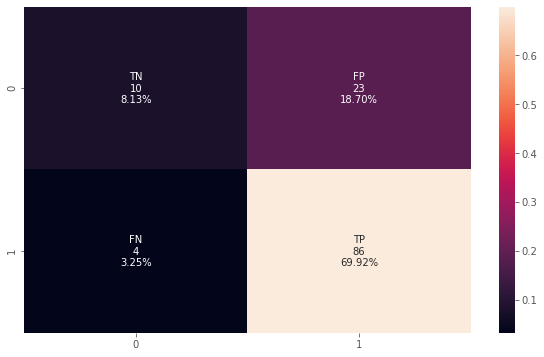

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

cm = confusion_matrix(y_test, y_test_pred) 

print('Confusion Matrix :')
print(cm)
print() 

# evaluate predictions
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print()

print ('Report : ')
print (classification_report(y_test, y_test_pred)) 

import seaborn as sns
names = ['TN','FP','FN','TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm/np.sum(cm), annot=labels, fmt='')
plt.show()

Confusion matrix
[[10 23]
 [ 4 86]]


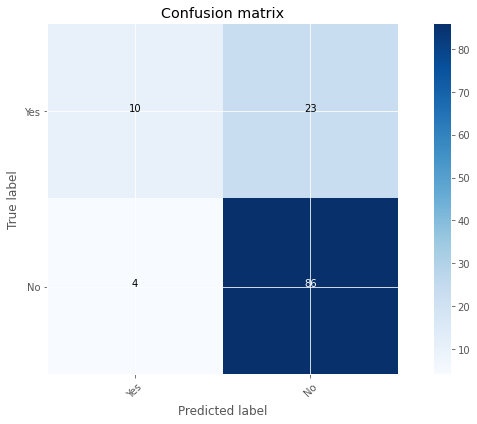

In [ ]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],
                      title='Confusion matrix')

## Recall Precision Tradeoff:
- As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. 
- If there is an instance where the model believes that is 58% likely to be a loan approval then the model will classify it as a "No." 
- However, that instance was actually a "Yes" (potential client eligible for loan) 
- That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes".

In [30]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))
print('F1 Scroe:', f1_score(y_train, y_train_pred))

Precision Score:  0.7855421686746988
Recall Score:  0.9819277108433735
F1 Scroe: 0.8728246318607764


### ROC Curve (Receiver Operating Characteristic):
- The ROC curve tells us how well our classifier is classifying between yes and no. 
- The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) 
- As the line moves the threshold of the classification changes giving us different values. 
- The closer is the line to our top left corner the better is our model separating both classes.

In [ ]:
pip install scikit-plot

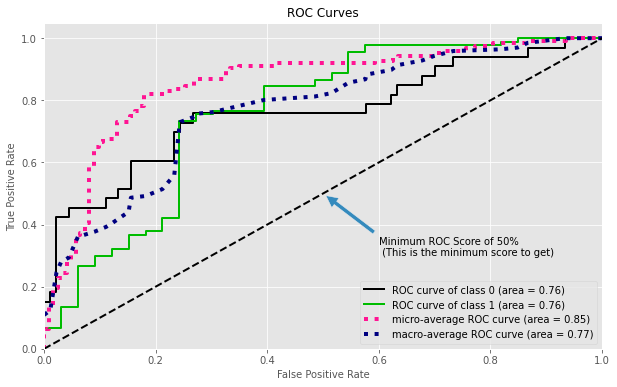

In [66]:
import scikitplot as skplt #to make things easy

# predict probabilities
yhat = log_reg.predict_proba(x_test)

plt.rcParams['figure.figsize'] = [10, 6]
skplt.metrics.plot_roc_curve(y_test, y_hat)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05))
plt.show()

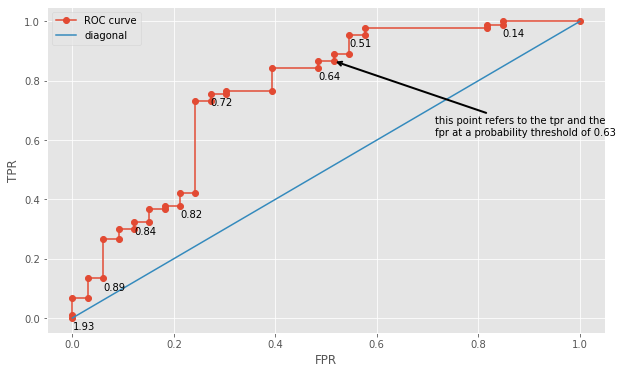

In [67]:
# retrieve just the probabilities for the positive class
probs = y_hat[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.annotate('this point refers to the tpr and the \nfpr at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(color='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

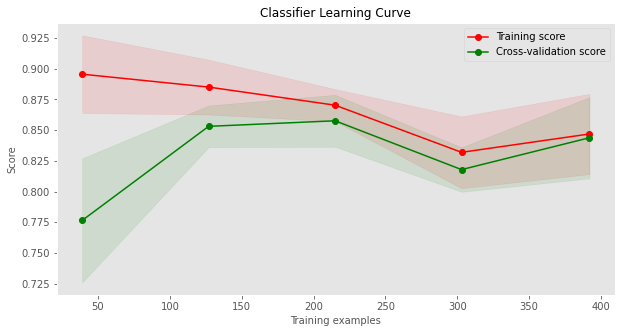

In [68]:
skplt.estimators.plot_learning_curve(
 log_reg, x_train, y_train, title="Classifier Learning Curve",
 scoring="f1", cv=kfold, shuffle=True, random_state=42, n_jobs=-1,  figsize=(10, 5))
plt.show()

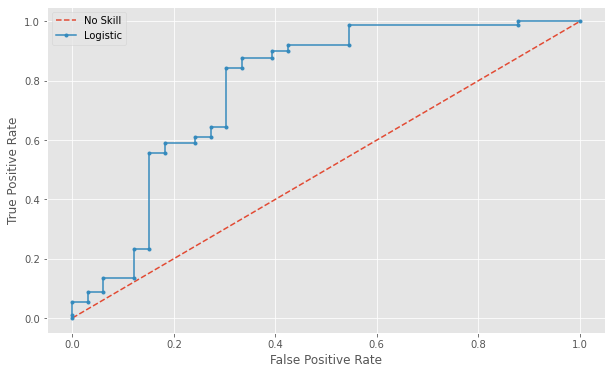

In [38]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# predict probabilities
yhat = model.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.864 auc=0.865


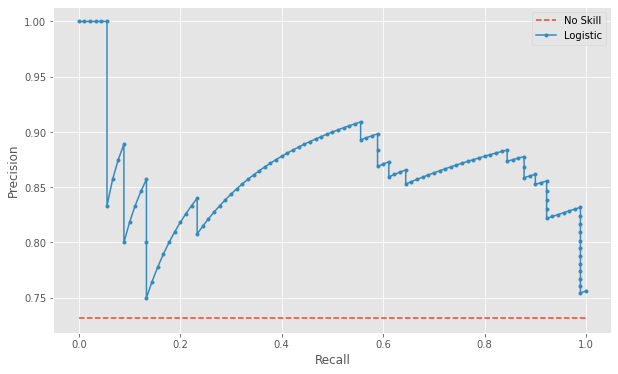

In [39]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# predict probabilities
lr_probs = log_reg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = log_reg.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_test_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


# Ensemble model

In [40]:
# Our three classifiers are grad_clf (gradiesnt boosting), log_reg (logistic regression) and rand_clf (random forest)
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('logistic', log_reg), ('randon', rand_clf), ('gradient', grad_clf)],
    voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('randon',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_wei...
                                        

In [41]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, rand_clf, grad_clf, voting_clf):
    clf.fit(x_train, y_train)
    predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

LogisticRegression 0.8373983739837398
RandomForestClassifier 0.7642276422764228
GradientBoostingClassifier 0.7967479674796748
VotingClassifier 0.8211382113821138


Ensemble learning proben to be best so far with 83.73% accuracy.

## Domain specific Feature Engineering
- Total Income - Combining the Applicant Income and Coapplicant Income if the total income is high, chances of loan approval might also be high.
- Equated Monthly Installment
- Balance Income - income left after the EMI has been paid and if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

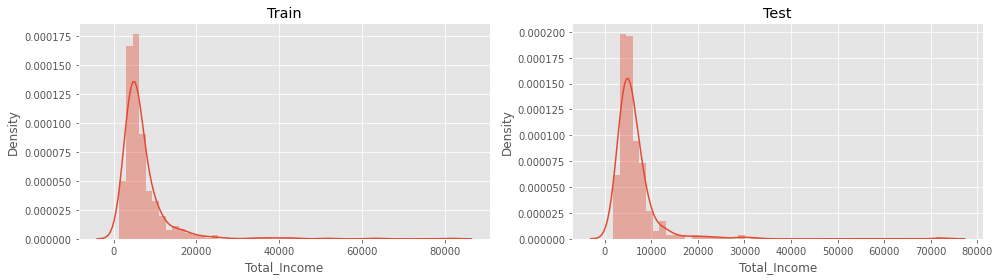

In [42]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")
plt.tight_layout()

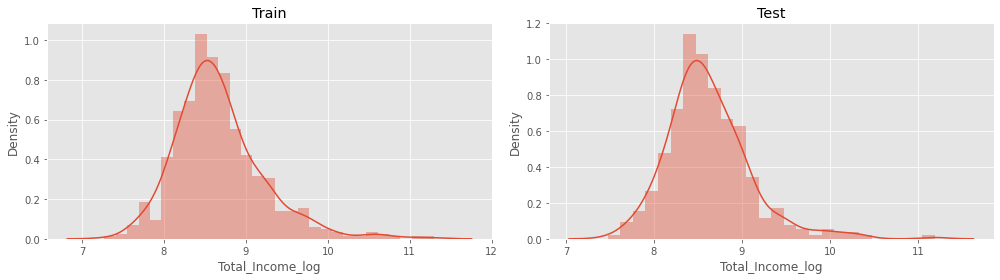

In [43]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")
plt.tight_layout()

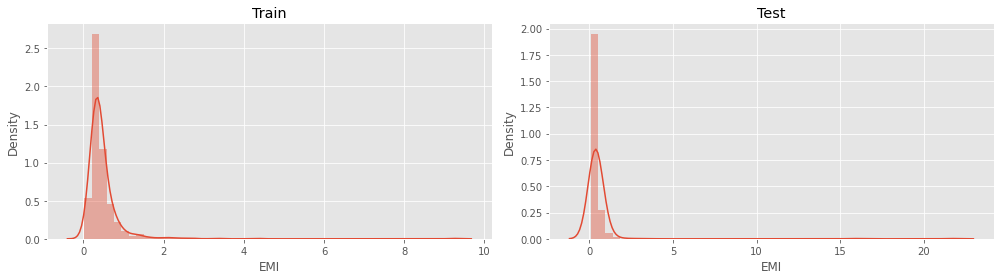

In [44]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")
plt.tight_layout()

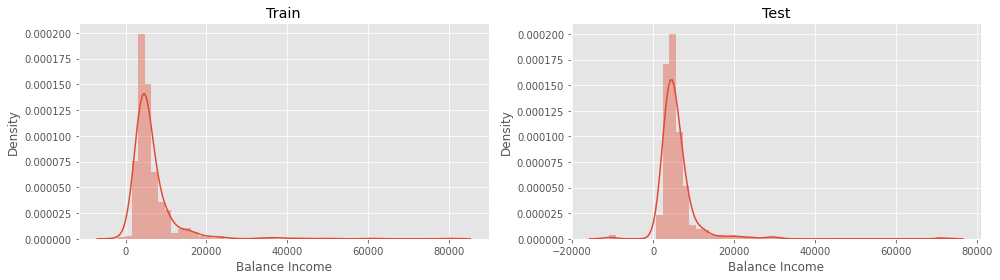

In [45]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")
plt.tight_layout()

In [46]:
# drop some variables to avoid multi-colinearity
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
train.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


# Model development with new features

In [47]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 20), (123, 20), (491,), (123,))

### Applying ensemble learning

In [49]:
# Our three classifiers are grad_clf (gradiesnt boosting), log_reg (logistic regression) and rand_clf (random forest)
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('logistic', log_reg), ('randon', rand_clf), ('gradient', grad_clf)],
    voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('randon',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_wei...
                                        

In [50]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, rand_clf, grad_clf, voting_clf):
    clf.fit(x_train, y_train)
    predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

LogisticRegression 0.8211382113821138
RandomForestClassifier 0.7642276422764228
GradientBoostingClassifier 0.7642276422764228
VotingClassifier 0.8211382113821138


In [51]:
# make prediction on test set
prediction = voting_clf.predict(test)
# take a look at the prediction
prediction[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

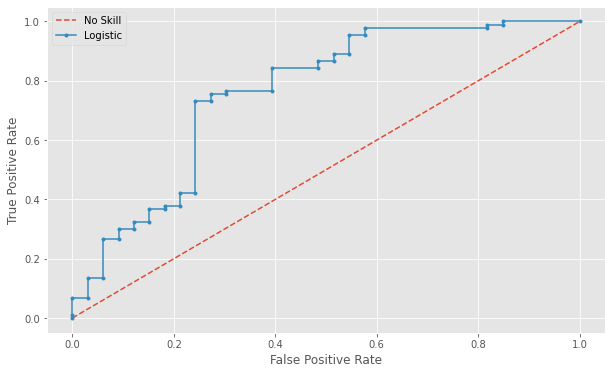

In [52]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# predict probabilities
y_hat = voting_clf.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = y_hat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Determine thresholds for test from ROC-curve


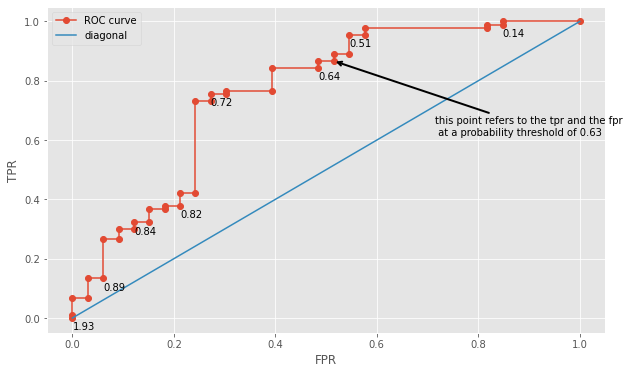

In [53]:
import sklearn.metrics as metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_probs)

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(color='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

I have annotated every 5th value which is enough to see the relationship 
- high confidence - bottom left, 
- low confidence - top right.

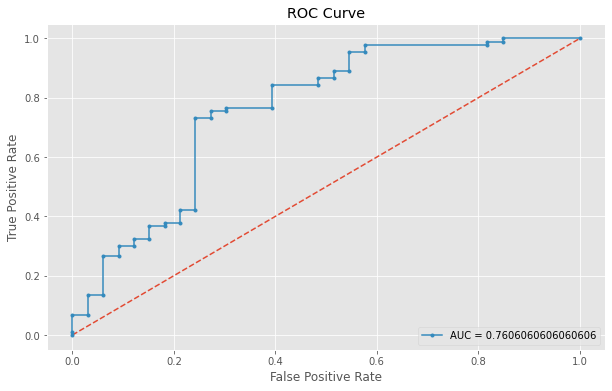

In [54]:
fpr, tpr, proba = roc_curve(y_test, pos_probs)
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(fpr, tpr, marker=".", label=f"AUC = {roc_auc_score(y_test, pos_probs)}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Optimal Probability Thresholds with ROC Curve

In [55]:
predictions = voting_clf.predict(x_test)

# Youden's J statistic
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in pos_probs]

### Evaluate Model (After Thresholding) 

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.8211382113821138, 0.7398373983739838
Precision Score Before and After Thresholding: 0.8269230769230769, 0.8918918918918919
Recall Score Before and After Thresholding: 0.9555555555555556, 0.7333333333333333
F1 Score Before and After Thresholding: 0.88659793814433, 0.8048780487804879


### Confusion Matrix of Model (After Thresholding) 

In [57]:
y_actual = pd.Series(y_test, name='Actual')
y_predict = pd.Series(roc_predictions, name='Predicted')
df_confusion = pd.crosstab(y_actual, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print (df_confusion)

Predicted   0   1  All
Actual                
0           2   9   11
1           9   6   15
All        11  15   26


Confusion Matrix :
[[25  8]
 [24 66]]

Accuracy: 73.98%

Report : 
              precision    recall  f1-score   support

           0       0.51      0.76      0.61        33
           1       0.89      0.73      0.80        90

    accuracy                           0.74       123
   macro avg       0.70      0.75      0.71       123
weighted avg       0.79      0.74      0.75       123



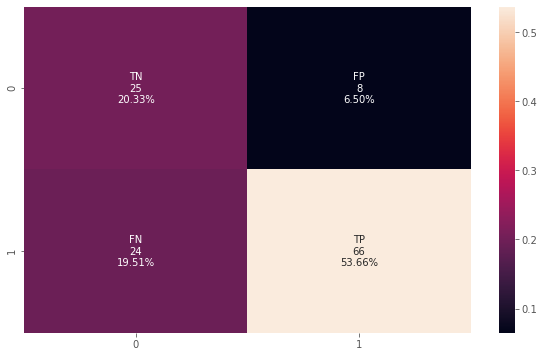

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

cm = confusion_matrix(y_actual, y_predict) 

print('Confusion Matrix :')
print(cm)
print() 

# evaluate predictions
accuracy = accuracy_score(y_actual, y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print()

print ('Report : ')
print (classification_report(y_actual, y_predict)) 

import seaborn as sns
names = ['TN','FP','FN','TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm/np.sum(cm), annot=labels, fmt='')
plt.show()

Confusion matrix, without normalization
[[24  9]
 [21 69]]


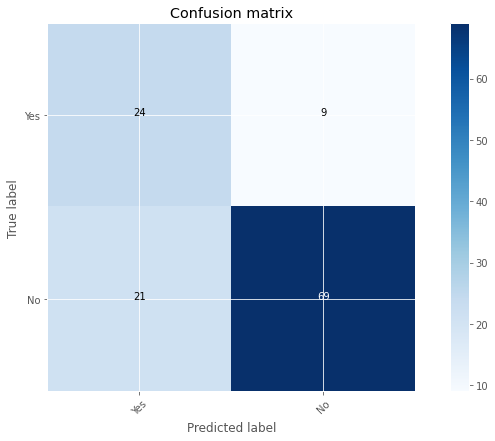

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],
                      title='Confusion matrix')

plt.show()

In [ ]:
positive_class = int(1)
TP = int(69)
FP = int(9)
TN = int(24)
FN = int(21)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        33
           1       0.88      0.77      0.82        90

    accuracy                           0.76       123
   macro avg       0.71      0.75      0.72       123
weighted avg       0.79      0.76      0.77       123



In [ ]:
pip install scikit-plot

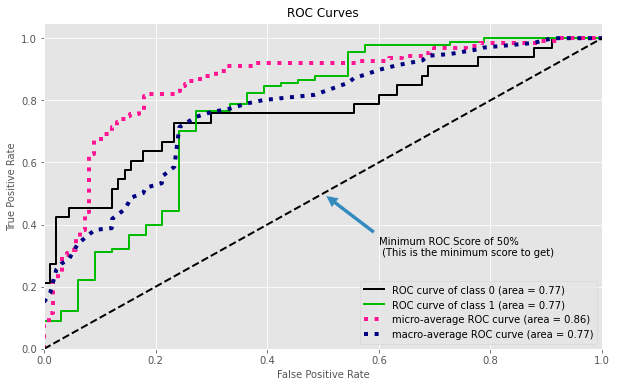

In [ ]:
import scikitplot as skplt #to make things easy
y_pred = voting_clf.predict_proba(x_test)
plt.rcParams['figure.figsize'] = [10, 6]
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05))
plt.show()

## Learning curve- (Bias-Variance)

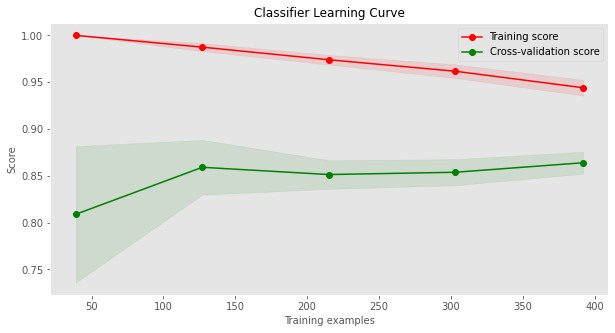

In [ ]:
skplt.estimators.plot_learning_curve(
 voting_clf,
 x_train,
 y_train,
 title="Classifier Learning Curve",
 scoring="f1",
 cv=kfold,
 shuffle=True,
 random_state=42,
 n_jobs=-1,
 figsize=(10, 5))
plt.show()

training score decelerate when the number of training examples increased while the cross-validation score tried to maintain its performance when the number of training examples increased.

However, the graph shows that the model suffers from high variance, which is
indicated by the large gap between the training and cross-validation accuracy. To address this problem of overfitting:
- we can collect more training data, reduce the complexity of the model, or 
- increase the regularization parameter, for example. For unregularized models, it can also help decrease the number of features via feature selection or feature extraction to decrease the degree of overfitting. 
- While collecting more training data usually tends to decrease the chance of overfitting, it may not always help, for example, if the training data is extremely noisy or the model is already very close to optimal.

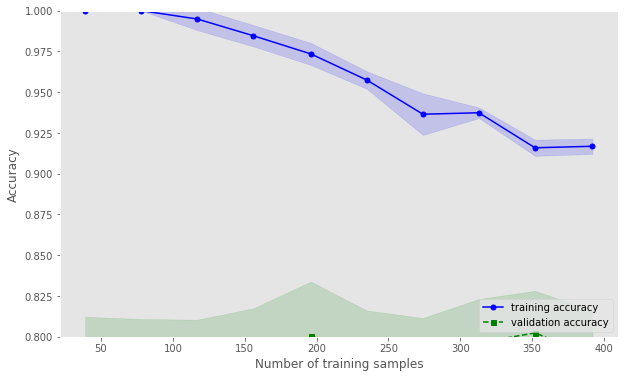

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores =\
learning_curve(estimator=voting_clf,X=x_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10, 100), cv=kfold, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

## Reporting based on ensemble model

In [ ]:
# loading test data
uploaded = files.upload()

Saving report_loan_approval.csv to report_loan_approval.csv


In [ ]:
report = pd.read_csv("report_loan_approval.csv")
# fill the Loan_ID and Loan_Status
report['Loan_Status'] = prediction
report['Loan_ID'] = df1['Loan_ID']

# replace with "N" and "Y"
report['Loan_Status'].replace(0, 'N', inplace=True)
report['Loan_Status'].replace(1, 'Y', inplace=True)
report

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [ ]:
from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (report.style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1
